<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor) + [solution](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor-solution).**

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [232]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [356]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        
        
    def fit(self, X, y):
        X0 = np.ones(X.shape[0]).reshape(-1, 1)
        X_train = np.hstack((X0, X))
        w = np.zeros(X_train.shape[1])
#         self.weights_.append(w) # leads to an error (without adding 0-mse)

        for epoch in tqdm(range(self.n_epochs)):
            for xi, yi in zip(X_train, y):
                w = w + self.eta * (yi - np.sum(xi * w)) * xi
                self.weights_.append(w)
#                 self.mse_.append(sum((y - np.matmul(X_train, w))**2) / len(y)) # too slow
                self.mse_.append(mean_squared_error(y, X_train.dot(w)))
                
        self.weights_ = np.array(self.weights_)
        self.w_ = self.weights_[np.argmin(self.mse_)]
                
        return self
         
        
    def predict(self, X):
        X0 = np.ones(X.shape[0]).reshape(-1, 1)
        X_test = np.hstack((X0, X))
        
        return X_test.dot(self.w_)

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [3]:
data_demo = pd.read_csv('../../data/weights_heights.csv')

In [67]:
data_demo

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


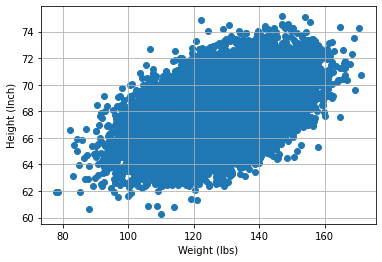

In [4]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [307]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [308]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [335]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [357]:
%%time
regressor = SGDRegressor()
regressor.fit(X_train_scaled, y_train)

  0%|          | 0/3 [00:00<?, ?it/s]

Wall time: 11.1 s


SGDRegressor()

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

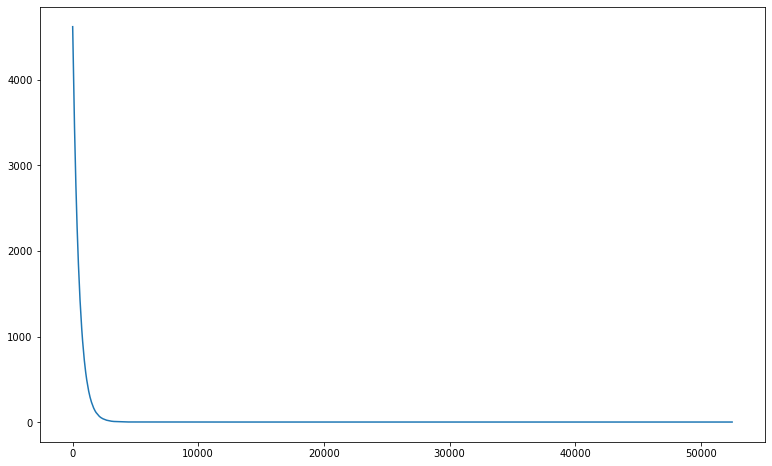

In [358]:
plt.figure(figsize=(13, 8))
plt.plot(regressor.mse_);

Print the minimal value of mean squared error and the best weights vector.

In [359]:
min(regressor.mse_), regressor.w_

(2.7151352406643623, array([67.9898497 ,  0.94447605]))

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

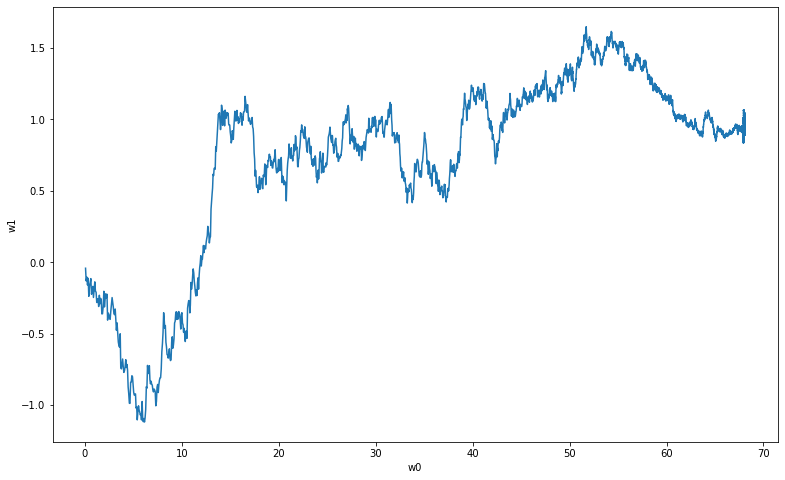

In [360]:
plt.figure(figsize=(13, 8))
plt.plot(regressor.weights_[:, 0], regressor.weights_[:, 1])
plt.xlabel('w0')
plt.ylabel('w1');

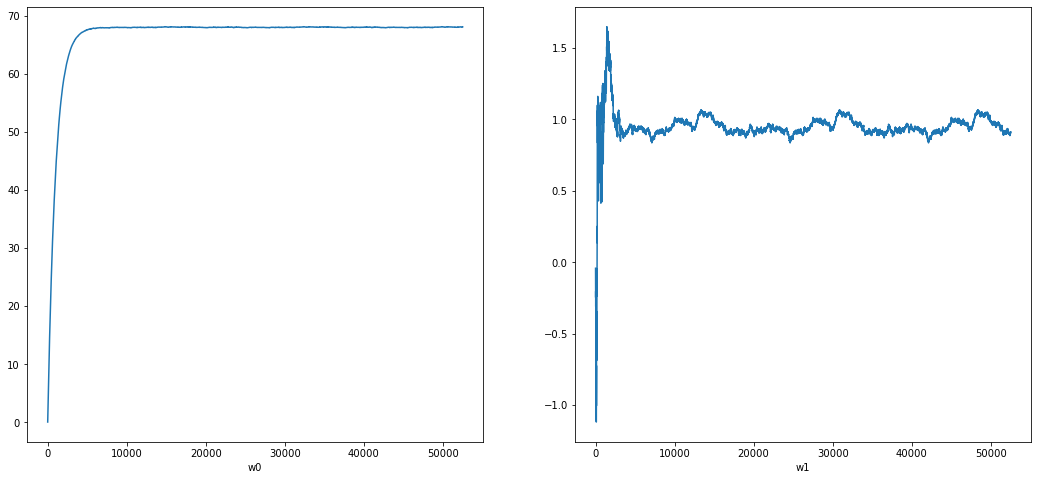

In [375]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.plot(regressor.weights_[:, 0])
ax1.set_xlabel('w0')
ax2.plot(regressor.weights_[:, 1])
ax2.set_xlabel('w1');

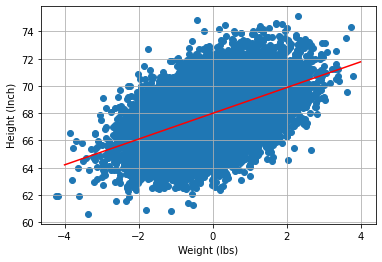

In [394]:
plt.scatter(X_train_scaled, y_train)
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
x = np.linspace(-4, 4)
plt.plot(x, regressor.w_[0] + regressor.w_[1]*x, c='red')
plt.grid();

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [395]:
sgd_holdout_mse = mean_squared_error(y_valid, regressor.predict(X_valid_scaled))
sgd_holdout_mse

2.6708681207033784

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [396]:
from sklearn.linear_model import LinearRegression

regressor_skl = LinearRegression()
regressor_skl.fit(X_train_scaled, y_train)
linreg_holdout_mse = mean_squared_error(y_valid, regressor_skl.predict(X_valid_scaled))
print(regressor_skl.intercept_, regressor_skl.coef_)
print(linreg_holdout_mse)

67.98930834742858 [0.94537278]
2.6708307676676344


In [363]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
